<a href="https://colab.research.google.com/github/lake198/Study-AI/blob/main/%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Study_AI/DNN_code_colab_lesson_3_4')

In [ ]:
from common import functions
from common import optimizer
from common import layers

import numpy as np
import matplotlib.pyplot as plt

# [Section1] 再起型ニューラルネットワーク

# RNN

\
<img src="https://drive.google.com/uc?export=view&id=1OjAK1gl2Mok5p4BrVX4fudnvfRuFOixX" width=60%>

RNN（再起型ニューラルネットワーク）は、時系列データのように、各データが独立ではなく前後でつながりを持つ場合に適用される。RNNにおける順伝搬の計算の模式図を下図に示す。RNNの隠れ層は時刻 $t$ での入力データ $x^{t}$ に加えて、時刻 $t-1$ における隠れ層の出力 $h^{t-1}$ を受け取る。\
\
$$
r^{(t)}_j = \sum_i u_{ij}x^{(t)}_j + \sum_{j'}w_{j'j}h^{(t-1)}_j
$$
\
活性化関数を $\phi$ で表すと、\
\
$$
h^{(t)}_j = \phi(a^{(t)}_j)
= \phi \left(\sum_i u_{ij}x^{(t)}_j + \sum_{j'}w_{j'j}h^{(t-1)}_j\right)
$$
\
時刻 $t$ における出力層への入力をを $s_t$ 、予測結果を $y_t$ と置くと、\
\
$$
s^{(t)}_k = \sum_jv_{jk}h_j \\
y^{(t)}_k = \phi^{out}(s^{(t)}_k)
$$

#BPTT
時刻 $t$ の出力層から隠れ層への誤差の逆伝搬は\
\
$$\begin{eqnarray}
\frac{\partial E}{\partial {\bf v_k}}
&=&\frac{\partial E}{\partial y_k}\frac{\partial y_k}{\partial r_k}
\frac{\partial r_k}{\partial{\bf v}_k}\\[8pt]
&=&d^{(out)}_k \frac{\partial}{\partial{\bf v}_k}
\left(v_{1k}z_1+v_{2k}z_1+\cdots +v_{Jk}z_J+c\right)\\[8pt]
&=&\left[ d^{(out)}_kz_1,\ d^{(out)}_kz_2,\ \cdots,\ d^{(out)}_kz_J\right]
\end{eqnarray}$$\
$k=1,2,\cdots,K$ を考えると\
\
$$
\frac{\partial E}{\partial {\bf v}^{(t)}}={\bf z}^{(t)}\cdot{\bf d}^{(out,t)}
\ ,\quad {\bf d}^{(out,t)}=\frac{\partial E}{\partial {\bf y}} \phi'({\bf r}^{(t)})
$$
\
時刻 $t$ の隠れ層から入力層への誤差の逆伝搬は、\
\
$$\begin{eqnarray}
\frac{\partial E}{\partial {\bf u}^{(t)}}
&=&\frac{\partial E}{\partial{\bf z}^{(t)}}
\frac{\partial{\bf z}^{(t)}}{\partial{\bf s}^{(t)}}
\frac{\partial{\bf s}^{(t)}}{\partial{\bf u}^{(t)}}\\[8pt]
&=&{\bf x} \cdot \frac{\partial E}{\partial{\bf z}^{(t)}}\phi'({\bf s}^{(t)})={\bf x}\cdot{\bf d}^{(t)}
\ ,\quad {\bf d}^{(t)}=\left( \frac{\partial E}{\partial{\bf z}^{(t)}} \phi'({\bf s}^{(t)})\right)
\end{eqnarray}$$
\
ここで $\frac{\partial E}{\partial {\bf z}}$ については、出力層からの伝搬と時刻 $t+1$ の隠れ層からの伝搬を考える必要があるので、\
\
$$\begin{eqnarray}
\frac{\partial E}{\partial {\bf z}^{(t)}}
&=&\frac{\partial E}{\partial{\bf z}^{(t+1)}}
\frac{\partial{\bf z}^{(t+1)}}{\partial{\bf s}^{(t+1)}}
\frac{\partial{\bf s}^{(t+1)}}{\partial{\bf z}^{(t)}}
+\frac{\partial E}{\partial{\bf y}^{(t)}}
\frac{\partial{\bf y}^{(t)}}{\partial{\bf r}^{(t)}}
\frac{\partial{\bf r}^{(t)}}{\partial{\bf z}^{(t)}}\\[8pt]
&=&{\bf d}^{(t+1)}\cdot{\bf w}^{(t)} + {\bf d}^{(out,t)}\cdot{\bf v}^{(t)}
\end{eqnarray}$$
\
従って\
\
$$\begin{align}
& \frac{\partial E}{\partial {\bf u}^{(t)}}
={\bf x}^{(t)}\cdot{\bf d}^{(t)}
\ ,\quad {\bf d}^{(t)}
=\left\{ {\bf d}^{(t+1)}\cdot{\bf w}^{(t)}
+{\bf d}^{(out,t)}\cdot{\bf v}^{(t)} \right\}
\otimes\phi'^{(t)}({\bf s}^{(t)})
\end{align}$$\
同様の計算を行って\
\
$$\begin{eqnarray}
\frac{\partial E}{\partial {\bf w}^{(t)}}
&=&\frac{\partial E}{\partial{\bf z}^{(t)}}
\frac{\partial{\bf z}^{(t)}}{\partial{\bf s}^{(t)}}
\frac{\partial{\bf s}^{(t)}}{\partial{\bf w}^{(t)}}
={\bf z}^{(t)}\cdot{\bf d}^{(t)}
\end{eqnarray}$$
\
上式により、時刻 $t=T$ から時刻 $t=0$ までの各時刻 $t$ における誤差の勾配を再帰的に計算することができる。ただし、時刻 $t=T$ においては次の隠れ層からの伝搬はないので、${\bf d}^{(T+1)} = {\bf 0}$ である。

## 確認テスト
\
<img src="https://drive.google.com/uc?export=view&id=1ZAggzPu7VHf49nbX_zimHysEyzkQApMM" width=50%>


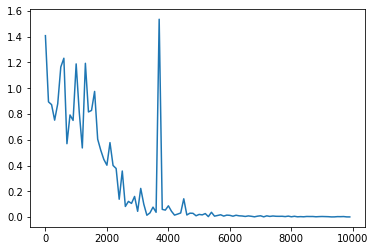

In [ ]:
# バイナリ加算

import numpy as np
from common import functions
import matplotlib.pyplot as plt


def d_tanh(x):
    return 1/(np.cosh(x) ** 2)

# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)
# Xavier
# W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size))
# W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size))
# W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size))
# He
# W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size)) * np.sqrt(2)
# W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)
# W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)

# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])
#         z[:,t+1] = functions.relu(u[:,t+1])
#         z[:,t+1] = np.tanh(u[:,t+1])    
        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])
#         delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_relu(u[:,t+1])
#         delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * d_tanh(u[:,t+1])    

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        # print("iters:" + str(i))
        # print("Loss:" + str(all_loss))
        # print("Pred:" + str(out_bin))
        # print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        # print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        # print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

# [Section2] LSTM (Long Short Term Memory)

RNNは時系列を遡るほど勾配が緩やかになるため、長い時系列データは学習が困難であるという課題がある。LSTMはRNNにおける隠れ層の代わりに、記憶セルと複数のゲートで構成されるLSTMブロックを持つ。記憶セルはブロック内のデータをどの程度次のブロックに伝えるかを決定し、各ゲートは記憶セルの内容書き換えを制御する。\
忘却ゲートは一つ前のブロックの出力 ${\bf z}^{(t-1)}$ と現時刻 $t$ における入力値 ${\bf x}^{(t)}$ の重み付き和を入力とし、シグモイド関数で活性化して、一つ前の記憶セルの状態 $c^{(t-1)}$ の各要素が情報を残す割合を出力する。\
\
$$
{\bf f}^{(t)}=\sigma\left(
  {\bf h}^{(t-1)}\cdot{\bf W}_f +
  {\bf x}^{(t)}\cdot{\bf U}_f+b_f \right)
$$\
入力ゲートは時刻 $t$ の新たな情報 ${\bf g}$ から記憶セルとして追加する各要素の割合を出力する。新たな情報 ${\bf g}$ とは、${\bf z}^{(t-1)}$ と ${\bf x}^{(t)}$ の重み付き和を $\rm{tanh}$ 関数で -1~1 の範囲に正規化した値である。\
\
$$
{\bf g}^{(t)}=\rm{tanh} \left(
  {\bf h}^{(t-1)}\cdot{\bf W}_g +
  {\bf x}^{(t)}\cdot{\bf U}_g+b_g \right)\\[4pt]
{\bf i}^{(t)}=\sigma \left(
  {\bf h}^{(t-1)}\cdot{\bf W}_i +
  {\bf x}^{(t)}\cdot{\bf U}_i+b_i \right)\\
$$\
ここまでの出力 ${\bf f},{\bf g},{\bf i}$ を用いて記憶セル ${\bf c}$ を更新する。\
\
$$
{\bf c}^{(t)}={\bf c}^{(t-1)}\odot{\bf f}^{(t)}+{\bf g}^{(t)}\odot{\bf i}^{(t)}
$$\
出力ゲートは記憶セルを $\rm{tanh}$ 関数で正規化した結果の各要素から、次のブロックに伝える情報の割合を決定する。出力ゲートによって、時刻 $t$ におけるブロックの出力 $h^{(t)}$ が得られる。\
\
$$
{\bf o}^{(t)}=\sigma \left(
  {\bf h}^{(t-1)}\cdot{\bf W}_o +
  {\bf x}^{(t)}\cdot{\bf U}_o+b_o \right)\\[4pt]
{\bf h}^{(t)}={\bf o}^{(t)}\odot\rm{tanh}({\bf c}^{(t)})
$$

\
<img src="https://drive.google.com/uc?export=view&id=1IT7ZpNNSo30aJAkk4gP9oZITjgdK7fdI" width=50%>



In [ ]:
# LSTMの順伝搬
def forward(x, h_prev, c_prev):
    # パラメータと変数の形状に関する値を取得
    Wx, Wh, b = self.params
    N, H = h_prev.shape
    
    # 全ての重みパラメータを列方向に結合して、重み付き和を一括計算している
    A = np.dot(x, Wx) + np.dot(h_prev, Wh) + b
        
    # ゲート値に変換
    f = functions.sigmoid(A[:, :H])
    g = np.tanh(A[:, H:2*H])
    i = functions.sigmoid(A[:, 2*H:3*H])
    o = functions.sigmoid(A[:, 3*H:])
    
    # 出力を計算
    c_next = f * c_prev + g * i  # 記憶セル
    h_next = o * np.tanh(c_next) # 出力データ
    

# [Section 3] GRU (Gated Reccurent Unit)

LSTMは学習するパラメータが多く、計算コストが大きいという課題があった。これを解決するためにGRUが考案された。GRUは2つのゲートを持ち、LSTMにあった記憶セルはなくなっている。学習するパラメータはLSTMより少なくなっているが、性能は同等であると言われている。\
リセットゲートは過去の情報を残す割合を決定する。\
\
$$
{\bf r}^{(t)}=\sigma\left(
  {\bf h}^{(t-1)}\cdot{\bf W}_r +
  {\bf x}^{(t)}\cdot{\bf U}_r+b_r \right)
$$\
ここで、入力データ ${\bf x}^{(t)}$ と過去の出力 ${\bf h}^{(t-1)}$ にリセットゲートの出力を掛けた ${\bf r}^{(t)}\odot{\bf h}^{(t-1)}$ の重み付き和を $\rm{tanh}$ 関数で活性化して、新たな情報 ${\bf c}$ とする。\
\
$$
{\bf c}^{(t)}=\rm{tanh}\left(
  ({\bf r}\odot{\bf h}^{(t-1)})\cdot{\bf W}_{c} +
  {\bf x}^{(t)}\cdot{\bf U}_{c}+b_c \right)
$$\
更新ゲートによって ${\bf c}^{(t)}$ と ${\bf h}^{(t-1)}$ の混合比 ${\bf z}^{(t)}$ を決定し、最終的な出力値 ${\bf h}^{(t)}$ を得る。\
\
$$
{\bf z}^{(t)}=\sigma\left(
  {\bf h}^{(t-1)}\cdot{\bf W}_z +
  {\bf x}^{(t)}\cdot{\bf U}_z+b_z \right) \\[4pt]
{\bf h}^{(t)}={\bf z}^{(t)}\odot{\bf c}^{(t)}+({\bf1}-{\bf z}^{(t)})\odot{\bf h}^{(t-1)}
$$

\
<img src="https://drive.google.com/uc?export=view&id=18sHXLc_TFoDcX9JOiRgFjclSyoOxJsih" width=50%>


In [ ]:
# GRUの順伝搬
def forward(x, h_prev, c_prev):
    # パラメータと変数の形状に関する値を取得
    Wx, Wh, b = self.params
    N, H = h_prev.shape
    
    # 結合したパラメータによる重み付き和の計算
    A = np.dot(x, Wx) + np.dot(h_prev, Wh) + b
    
    # 各ゲートの出力値を計算
    z = functions.sigmoid(A[:, :H])
    r = functions.sigmoid(A[:, H:2*H])

    c = np.tanh(np.dot(x, Wx[:, 2*H:]) + np.dot(r*h_prev, Wh[:, 2*H:]) + b)
    h_next = (1-z) * h_prev + z * h_hat
    

# [Section 4] 双方向RNN

通常のRNNは、時系列の古い方から新しい方へ情報を伝達する隠れ層を持つ。双方向これに加えて、時系列の新しい方から古い方へ情報を伝達する隠れ層を持つネットワークを双方向RNNと呼ぶ。時刻 $t$ におけるデータの予測では、時刻 0 ~ t-1 までのコンテキストと時刻 t+1 ~ T （T: 時系列データの長さ）までのコンテキストの両方を持っているため、通常のRNNよりも予測精度が高くなる。

\
<img src="https://drive.google.com/uc?export=view&id=10f0DBcpp353RVnj1eTL26Ypo8vmHl5vN" width=60%>


# [Section 5] Seq2Seq

Seq2Seq(Sequence to Sequence)はRNNを用いたEncoder-Decoderモデルの一種である。機械翻訳や自動応答など、自然言語処理の分野で特によく用いられる。Encoderは入力データを特徴ベクトルに変換する機構であり、Decoderは特徴ベクトルから新しいデータを生成する機構である。\
\
Encoder RNN は以下の手順で処理を行う。\
\
① 入力された文章を単語などのトークンに分割し、さらに各トークンをトークン毎に割り振られたIDに変換する。\
② 各トークンのIDを分散表現ベクトルに変換する。\
③ ②で得られたベクトルを順番にRNNに入力する。RNNの隠れ層は時系列情報を保存するため、最終的な隠れ層の出力は文章のコンテキストを保存している。\
\
Decoder RNN は、隠れ層の初期状態として Encoder RNN の隠れ層の最終出力を受け取り、以下の手順で予測結果となる文章を出力する。\
\
① BOS (Beginning of the sentens) を表すEmbed Vector を入力し、最初のトークンの生成確率を出力する。\
② ①得られた生成確率に基づいてランダムにトークンを選び、これをEmbedingしたものを次の時系列データとしてRNNに入力する。この入力に対する出力として、入力トークンに続くトークンの生成確率を得る。\
③ ②を繰り返して得られた時系列データ（ベクトル表現）を文字列に変換して出力結果としての文章を得る。




## 確認テスト
\
<img src="https://drive.google.com/uc?export=view&id=1wlgPj8RT81FgzNlIc2vAtcc5aJmFAMFT" width=60%>

## 演習チャレンジ
\
<img src="https://drive.google.com/uc?export=view&id=1qy9SFYKBaiRgtBjneLOOHu3SOb41lPYf" width=60%>

# [Section 6] Word2Vec

単語をベクトルで表現する手法としてOne-hot表現と分散表現がある\
\
One-hot-vectorはある要素のみ1で他の要素は0のベクトルである。このベクトルで単語を表現する場合、一つの要素が一つの単語に対応する。そのためボキャブラリの数が多くなるほど高次元のベクトルを扱う必要があり、またベクトル間の演算に意味を持たせることができない。\
\
分散表現は単語を固定長（数十～数百次元）の実数値ベクトルで表す。分散表現によって単語同士の関係性を評価することができ、ベクトル間の演算に意味を持たせることができる。またボキャブラリの数が増えても取り扱うベクトルの次元を一定にできる。\
\
Word2Vecは単語の分散表現を獲得するための手法である。その仕組みは一つの中間層を持つ2層構造のニューラルネットワークであり、入力したコンテキストに対して周囲の単語からある単語を予測するCBoWモデル、ある単語からその周囲に現れる単語を予測するSkip-gramモデルがある。このモデルを学習して得られた中間層の重みが、目的とする単語の分散表現ベクトルとなる。

# [Section 7] Attention Mechanism

Seq2Seqは機械翻訳の分野でよく用いられるが、decoder RNN の隠れ層はencoder RNNの隠れ層の最終状態を初期状態として受け取るため、入力する文章が長くなるとトークン同士の長期依存性を取り込むことが困難になるという課題があった。そこで、ここにAttentionという仕組みを追加する事により、機械翻訳の精度が大きく向上した。\
Attention Mechanism では、decoder RNN の隠れ状態 ${\bf s}^{(t)}$ を計算するにあたり、一つ前の状態  ${\bf s}^{(t-1)}$ と encoder の隠れ状態を時系列方向に全て束ねたテンソル ${\bf h}$ との内積を取り、ソフトマックス関数で活性化して Attention Weight ${\bf a}$ を計算する。さらにこの ${\bf a}$ と ${\bf h}$ との内積から contex vector ${\bf c}$ を計算する。通常のRNNでは隠れ層の状態を計算する際に、一つ前の隠れ層の出力と入力データの重み付き和を用いるが、Attention Mechanism の decoder RNN では、ここに ${\bf c}$ を含めて重み付き和を計算し、最終的な出力の計算に利用する。この仕組みによって、入力データの各トークンと出力データの各トークンの関係性の強さを学習することができる。

\
<img src="https://drive.google.com/uc?export=view&id=1P4zelANwu-khFc3R65Uc3Qn71vgGCuSH" width=60%>


## 確認テスト
\
<img src="https://drive.google.com/uc?export=view&id=1YRhkTXptHWdPYTW_QLwduvBJErCvzlCS" width=60%>
